# BLU05  - Exercise Notebook 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import hashlib # for grading purposes

import pmdarima as pm
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   
warnings.filterwarnings("ignore") # specify to ignore warning messages
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 4)

# Functions

In [2]:
def load_emissions_data():
    emissions = pd.read_csv('data/emissions.csv')
    emissions = emissions[emissions.Description=='Coal Electric Power Sector CO2 Emissions']
    emissions['YYYYMM'] = emissions['YYYYMM'].astype(str)
    emissions['YYYYMM'] = pd.to_datetime(emissions['YYYYMM'],format='%Y%m', errors='coerce').dropna()
    emissions = emissions.set_index('YYYYMM')
    emissions = emissions.sort_index()
    emissions['Value'] = emissions.Value.astype(float)
    emissions.index = emissions.index.rename('date')
    emissions = emissions['Value']
    emissions = emissions['1980':'2000']
    emissions = emissions.resample('MS').mean()
    return emissions

In [3]:
def load_coal_data():
    np.random.seed(10)
    df = pd.read_csv('data/MER_T06_01.csv')
    df = df[df.Description=='Coal Consumption']
    df.YYYYMM = pd.to_datetime(df.YYYYMM, format='%Y%m',errors='coerce' )
    df = df.set_index('YYYYMM')
    df = df.loc['1980':'2000']
    df.Value = pd.to_numeric(df.Value)
    df.Value = df.Value + np.random.normal(0,df.Value.mean()/20,len(df.Value))
    return df.Value.to_frame()

# Let's predict CO2 emissions!

In [4]:
emissions = load_emissions_data()

In [5]:
emissions

date
1980-01-01    100.568
1980-02-01     94.862
1980-03-01     93.210
1980-04-01     81.245
1980-05-01     82.785
               ...   
2000-08-01    179.476
2000-09-01    158.627
2000-10-01    156.631
2000-11-01    155.015
2000-12-01    169.514
Freq: MS, Name: Value, Length: 252, dtype: float64

In [6]:
emissions_train = emissions[:'1998']
emissions_test = emissions['1998':]

In [7]:
emissions_train

date
1980-01-01    100.568
1980-02-01     94.862
1980-03-01     93.210
1980-04-01     81.245
1980-05-01     82.785
               ...   
1998-08-01    174.745
1998-09-01    156.709
1998-10-01    147.334
1998-11-01    139.397
1998-12-01    154.318
Freq: MS, Name: Value, Length: 228, dtype: float64

In [8]:
emissions_test

date
1998-01-01    159.602
1998-02-01    138.682
1998-03-01    144.143
1998-04-01    133.418
1998-05-01    146.249
1998-06-01    158.591
1998-07-01    174.995
1998-08-01    174.745
1998-09-01    156.709
1998-10-01    147.334
1998-11-01    139.397
1998-12-01    154.318
1999-01-01    161.387
1999-02-01    138.081
1999-03-01    145.169
1999-04-01    137.504
1999-05-01    144.891
1999-06-01    157.377
1999-07-01    179.420
1999-08-01    173.707
1999-09-01    154.874
1999-10-01    147.523
1999-11-01    142.095
1999-12-01    154.387
2000-01-01    172.903
2000-02-01    155.750
2000-03-01    152.347
2000-04-01    137.295
2000-05-01    151.232
2000-06-01    165.771
2000-07-01    172.816
2000-08-01    179.476
2000-09-01    158.627
2000-10-01    156.631
2000-11-01    155.015
2000-12-01    169.514
Freq: MS, Name: Value, dtype: float64

##### Plot the series to get an idea of what's going on

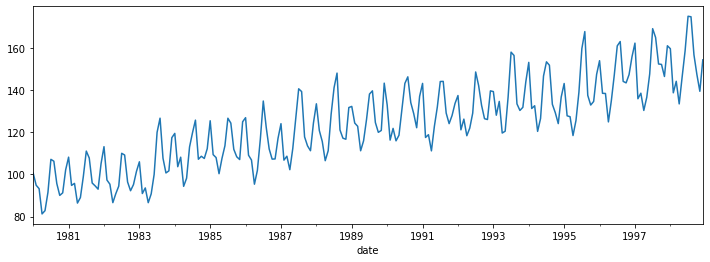

In [9]:
emissions_train.plot();

Get a feel for the data:
 - Is the magnitude of the variance changing? 
 - Is there seasonality? 
 - Does it have an apparent trend? 

### Q1: Make the time series stationary

<AxesSubplot:xlabel='date'>

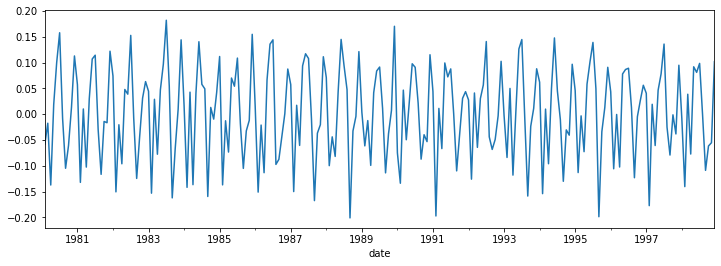

In [10]:
emissions_train_log = emissions_train.map(np.log)
emissions_train_log_detrend =emissions_train_log.diff() 
emissions_train_log_detrend_without_nans =  emissions_train_log_detrend.dropna()
emissions_train_log_detrend_without_nans.plot()
# YOUR CODE HERE
#raise NotImplementedError()

In [11]:
expected_hash = 'a9bd2829b2d2191c657f4e3b13bf0feca647eb3630a15ebac45aa578d6199e3d'
assert hashlib.sha256(str(np.round(emissions_train_log_detrend_without_nans[0],5)).encode()).hexdigest() == expected_hash

### Q2: Use autocorrelations to look for seasonality.

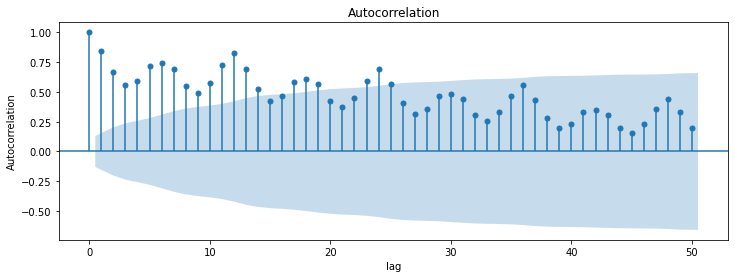

In [12]:
# Use the autocorrelations plots to infer what is the seasonality of the time series.
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
acf(emissions_train)
plot_acf(emissions_train,alpha=.05,lags = 50)  
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()

S =12

# YOUR CODE HERE
#raise NotImplementedError()

In [13]:
assert isinstance(S, int)
expected_hash = '6b51d431df5d7f141cbececcf79edf3dd861c3b4069f0b11661a3eefacbba918'
assert hashlib.sha256(str(S).encode()).hexdigest() == expected_hash

### Q3: Fit a SARIMAX model on the train set using AutoArima

In [14]:
#sarimax = pm.AutoARIMA(trace=True, supress_warnings=True, m=12, method='nm', maxiter=20)

In [15]:
# Use S according to what you saw on the previous question.
# Use the logged train dataset, but not the diffed since pmdarima can find that on his own.
# Use the 'nm' method and maxiter=20

sarimax = pm.AutoARIMA(trace=True, supress_warnings=True, m=12, method='nm', maxiter=20)
sarimax.fit(emissions_train_log)

# YOUR CODE HERE
#raise NotImplementedError()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-720.204, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-459.990, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-737.840, Time=0.31 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-594.557, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-461.884, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-460.564, Time=0.11 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-782.066, Time=0.38 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-588.196, Time=0.29 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-787.849, Time=0.90 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-753.811, Time=0.95 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-732.110, Time=0.89 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=-800.833, Time=0.83 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-793.954, Time=0.24 sec
 ARIMA(0,1,0)(2,0,0)[12]

AutoARIMA(m=12, maxiter=20, method='nm', trace=True)

In [16]:
expected_hash = 'ea646d4b57803d0a111b4566d42e889dcf5d96907d7dc50b6c98cc8a8fa63998'
assert hashlib.sha256(str(sarimax.get_params()).encode()).hexdigest() == expected_hash

### Q4: Use that model to do the in sample predictions and calculate the corresponding MAE

In [17]:
# Don't forget that you used the logged dataset when training the model.

predictions =np.exp(sarimax.predict_in_sample())
mae =mean_absolute_error(predictions,np.exp(emissions_train_log))
mae

# YOUR CODE HERE
#raise NotImplementedError()
#np.exp(predictions)


4.140678932373377

In [18]:
expected_hash = 'aa220c34fecec5633f7b7198a842f880bef8e0ec9166dcd370ac55886d2f012f'
assert hashlib.sha256(str(np.round(predictions,1)).encode()).hexdigest() == expected_hash

expected_hash = 'e979952da01e58fd4bfe9684a16ab22397e28f92ceed1c6bb16f93520a3e2134'
assert hashlib.sha256(str(np.round(mae,1)).encode()).hexdigest() == expected_hash

### Q5: Forecast the test set using a multi-step forecast and calculate the corresponding MAE

In [19]:
# Don't forget that you used the logged dataset when training the model.

forecast = np.exp(sarimax.predict(3*12,emissions_test[:]))
mae = mean_absolute_error(forecast,emissions_test)
mae

# YOUR CODE HERE
#raise NotImplementedError()

4.769905556883459

In [20]:
expected_hash = 'bb3c550c88ef9f8bc876af6f6064bd131834ce679c6d9bd67bbac978b24ba0b1'
assert hashlib.sha256(str(np.round(forecast,1)).encode()).hexdigest() == expected_hash

expected_hash = '9c7f38a9ac4f5de592be486948ac944aff688f914e3b74e6917c7fe4715a561e'
assert hashlib.sha256(str(np.round(mae,1)).encode()).hexdigest() == expected_hash

4.769905556883459


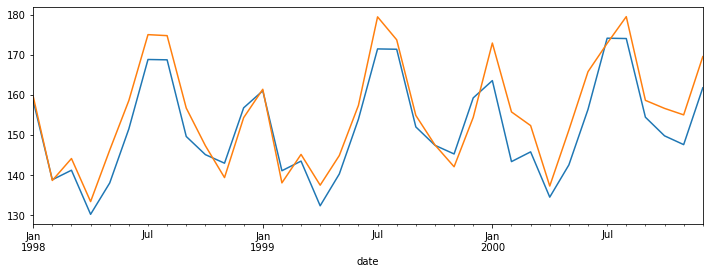

In [21]:
pd.Series(forecast, index=emissions_test.index).plot()
emissions_test.plot()
print(mae)

### Q6: Forecast the test set using multiple one-step forecasts

### Q6.1: Get the multiple one-step forecasts

In [22]:
# Don't forget to fit your sarimax model again
# You will need to make a for loop that updates the model

#sarimax_forecast_one_step_refit = []
#sarimax.fit(emissions_train_log)  
#emissions_test_logged = 
#Update loop

sarimax_forecast_one_step_refit = []
sarimax.fit(emissions_train_log) 
emissions_test_logged = np.log(emissions_test)
for i in np.arange(0,36): 
    next_step_forecast = sarimax.predict(1)[0]
    sarimax_forecast_one_step_refit.append(next_step_forecast)
    sarimax = sarimax.update(emissions_test_logged[i:i+1])

# YOUR CODE HERE
#raise NotImplementedError()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-720.204, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-459.990, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-737.840, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-594.557, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-461.884, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-460.564, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-782.066, Time=0.34 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-588.196, Time=0.26 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-787.849, Time=0.77 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-753.811, Time=0.80 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-732.110, Time=0.82 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=-800.833, Time=0.76 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-793.954, Time=0.25 sec
 ARIMA(0,1,0)(2,0,0)[12]

In [23]:
expected_hash = '800db53174f6574102ffba037098e465c5756a6da7b4acd92271ae54bbd9eac1'
assert hashlib.sha256(str(np.round(sarimax_forecast_one_step_refit)).encode()).hexdigest() == expected_hash

### Q6.2: Calculate the corresponding MAE

In [24]:
# Don't forget that you used the logged dataset when training the model.
sarimax_forecast_one_step_refit_exp =np.exp(sarimax_forecast_one_step_refit)
mae = mean_absolute_error(sarimax_forecast_one_step_refit_exp,emissions_test)
mae
# YOUR CODE HERE
#raise NotImplementedError()

3.4482743093049044

3.4482743093049044


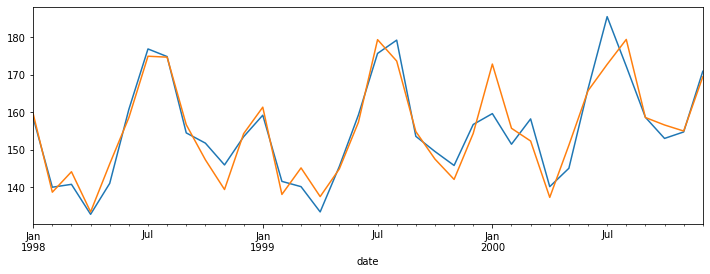

In [25]:
pd.Series(sarimax_forecast_one_step_refit_exp, index=emissions_test.index).plot()
emissions_test.plot()
print(mae)

In [26]:
expected_hash = 'a55edf466cf37e4a1d2bd6c7091627e358645538727d9876ebb7d3dd75cd772b'
assert hashlib.sha256(str(np.round(sarimax_forecast_one_step_refit_exp,1)).encode()).hexdigest() == expected_hash

expected_hash = '72d73db944cf6d9a5f11d6c073c1dce0bde28a4d2341caf4ae976e858c62cabc'
assert hashlib.sha256(str(np.round(mae,1)).encode()).hexdigest() == expected_hash

### Q7: Forecast the test set using multiple one-step forecasts updated on each step with exog input.

Let's test the performance of our model using an exogenous input: the coal consumption. Note that this dataset contains the coal consumption forecast made on the previous month. This means that we can use this exogenous data for doing one-step forecasts. 

In [27]:
exog = load_coal_data()
exog_train = exog[:'1998']
exog_test = exog['1998':]

Let's look at the data to get an idea of what we can expect:

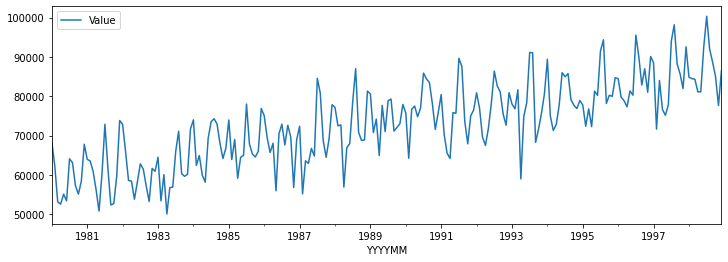

In [28]:
exog_train.plot();

### Q7.1: Get the multiple one-step forecasts with exog input

In [49]:
# Don't forget to fit your sarimax model again
# You will need to make a for loop that updates the model
# Note that this case is slightly different from the learning notebooks, where we used the exogenous data to do a
# multistep forecast. Here we need to use the exogenous data in the context of multiple one-step forecasts, this 
# means we need to have an update loop where we also include the new values of the exogenous data.

sarimax_forecast_one_step_refit = []
sarimax.fit(emissions_train_log,exog_train) 
for i in np.arange(0,len(exog_test)): 
    next_step_forecast = sarimax.predict(1,exog_test[i:i+1])[0]
    sarimax_forecast_one_step_refit.append(next_step_forecast)
    sarimax = sarimax.update(emissions_test_logged[i:i+1],exog_test[i:i+1])

# YOUR CODE HERE
#raise NotImplementedError()

In [50]:
expected_hash = '1a878151603301bf24597e803cb171b67c4eaad9da6ce7e7b9cb5b0541c4f89c'
assert hashlib.sha256(str(np.round(sarimax_forecast_one_step_refit,1)).encode()).hexdigest() == expected_hash

### Q7.2: Calculate the corresponding MAE

In [53]:
# Don't forget that you used the logged dataset when training the model.

sarimax_forecast_one_step_refit_exp = np.exp(sarimax_forecast_one_step_refit)
mae = mean_absolute_error(sarimax_forecast_one_step_refit_exp,exog_test)
mae
# YOUR CODE HERE
#raise NotImplementedError()

87242.46715785946

87242.46715785946


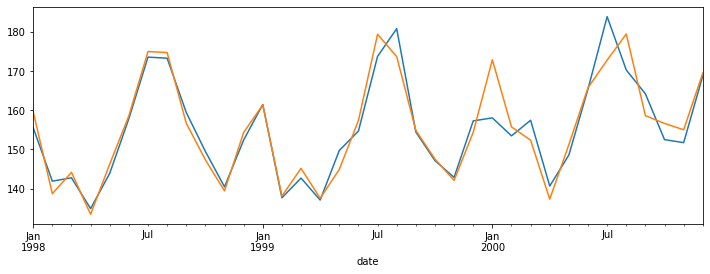

In [54]:
pd.Series(sarimax_forecast_one_step_refit_exp, index=emissions_test.index).plot()
emissions_test.plot()
print(mae)

In [55]:
expected_hash = '60d899f5a8b94c03219a705ed311542df3d66bed3599494d81db4b34ec5678fe'
assert hashlib.sha256(str(np.round(sarimax_forecast_one_step_refit_exp,1)).encode()).hexdigest() == expected_hash

expected_hash = '3135d2d71bff77be4838a7102bbac5b87af7fd0b9aef3d416f963a5afbb19061'
assert hashlib.sha256(str(np.round(mae,1)).encode()).hexdigest() == expected_hash

AssertionError: 